In [113]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
#Problem 1
def phi(interval, nodes):
    #Interval is an array with 2 entries, could add an error message if interval is longer than 2
    #entries but seems unnecessary.
    t = np.full_like(np.arange(len(nodes), dtype=float), (interval[1]+interval[0])/2)
    #t = np.full((interval[1]+interval[0])/2, int(len(nodes)))
    return ((interval[1]-interval[0])/2)*nodes + t

In [115]:
def chebyshev(n):
    cheb = []
    for i in range(1, n+1):
        cheb += [np.cos(((2*i-1)/(2*n))*np.pi)]
    return np.array(sorted(cheb))

In [116]:
def runge(x):
    return (1/(x**2+1))

In [117]:
def lagInterp(x, y, evaluate):
    solution = []
    #if(len(evaluate)==1):
    val = 0
    for point in evaluate:
        val = 0
        for i in range(len(x)):
            li = 1
            #print("This is i", i)
            for j in range(len(x)):
                if(j==i):
                    continue
                #print("This is i an j", i, j)
                if(x[i]==x[j]):
                    print("Divide by zero!", i, j)
                li = li*((point-x[j])/(x[i]-x[j]))
                #print("This is li", li)
    #print("This is point name", point)
        
            val += li*y[i]
            #print("This is val", val)
        solution += [val]
    return np.array(solution)

In [118]:
#Smooth function
def smooth(x):
    return np.exp(x)

Text(0.5, 1.0, 'Interpolation')

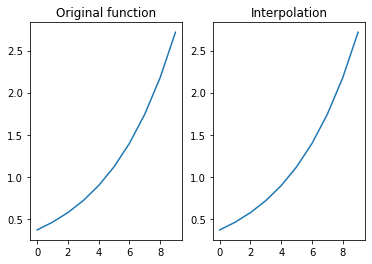

In [119]:
#Testing for the a smooth function on [-1, 1] with equidistant nodes
x = np.linspace(-1, 1, 10)
y = smooth(x)
test = lagInterp(x, y, np.linspace(-1,1,10))
plt.subplot(1,2,1)
plt.plot(y)
plt.title("Original function")

plt.subplot(1,2,2)
plt.plot(test)
plt.title("Interpolation")

Text(0.5, 1.0, 'Interpolation')

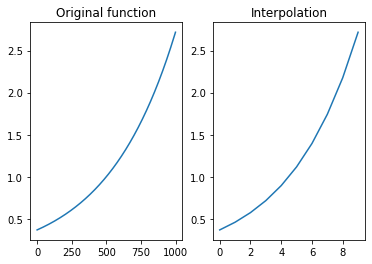

In [124]:
#Testing for the a smooth function on [-1, 1] with Chebyshev nodes
x = chebyshev(10)
y = smooth(x)
test = lagInterp(x, y, np.linspace(-1,1,10))
y_true = smooth(np.linspace(-1,1,1000))

plt.subplot(1,2,1)
plt.plot(y_true)
plt.title("Original function")

plt.subplot(1,2,2)
plt.plot(test)
plt.title("Interpolation")

In [139]:
#Implementing for the Runge function on the interval [-5,5] for n=10
n = 10
x_cheb = phi([-5, 5], chebyshev(n))
y_cheb = runge(x_cheb)
eval_cheb = np.linspace(-5,5,100)
cheb = lagInterp(x_cheb, y_cheb, eval_cheb)

x_equi = np.linspace(-5,5, n)
y_equi = runge(x_equi)
eval_equi = np.linspace(-5,5,100)
equi = lagInterp(x, y, eval_equi)

x_true = np.linspace(-5,5,1000)
y_true = runge(x_true)

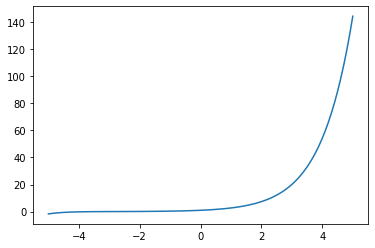

In [140]:
plt.plot(eval_equi, equi)
#We see that the interpolation on equidistant nodes diverges

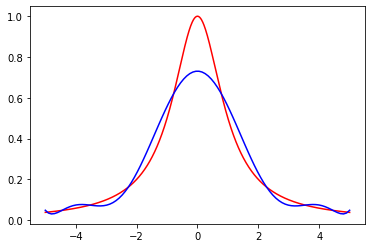

In [141]:
plt.plot(x_true, y_true, 'r',  x_test, cheb, 'b')
#CHebyshev nodes converge

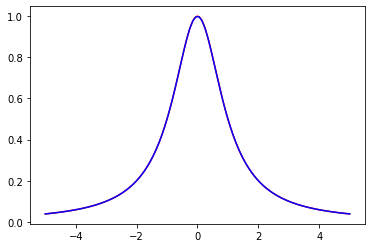

In [142]:
#If we increase n:
#Implementing for the Runge function on the interval [-5,5] for n=10
n = 100
x_cheb = phi([-5, 5], chebyshev(n))
y_cheb = runge(x_cheb)
eval_cheb = np.linspace(-5,5,100)
cheb = lagInterp(x_cheb, y_cheb, eval_cheb)

x_equi = np.linspace(-5,5, n)
y_equi = runge(x_equi)
eval_equi = np.linspace(-5,5,100)
equi = lagInterp(x, y, eval_equi)

x_true = np.linspace(-5,5,1000)
y_true = runge(x_true)
plt.plot(x_true, y_true, 'r',  x_test, cheb, 'b')
#We get good convergence at high n

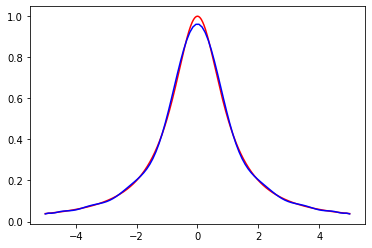

In [143]:
#At a minor increase in n n=20:
n = 20
x_cheb = phi([-5, 5], chebyshev(n))
y_cheb = runge(x_cheb)
eval_cheb = np.linspace(-5,5,100)
cheb = lagInterp(x_cheb, y_cheb, eval_cheb)

x_equi = np.linspace(-5,5, n)
y_equi = runge(x_equi)
eval_equi = np.linspace(-5,5,100)
equi = lagInterp(x, y, eval_equi)

x_true = np.linspace(-5,5,1000)
y_true = runge(x_true)
plt.plot(x_true, y_true, 'r',  x_test, cheb, 'b')
#We start to get good performance

In [8]:
#Problem 1b
def f_1(x):
    return np.cos(2*np.pi*x)
    
def f_2(x):
    return (np.exp(3*x))*np.sin(2*x)

In [9]:
def infNorm(function, interpolation):
    return np.max(np.abs(function - interpolation))

def twoNorm(function, interpolation, interval):
    return (np.sqrt(interval[1]-interval[0])/np.sqrt(len(function)))*((np.sum((function-interpolation)**2))**2)

n =  1
n =  6
n =  11
n =  16
n =  21
n =  26
n =  31
n =  36
n =  41
n =  46


Text(0.5, 1.0, 'twoNorm')

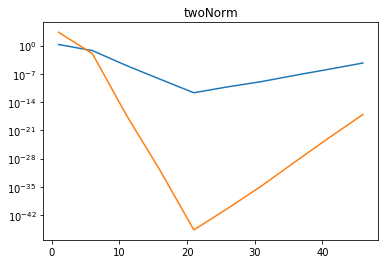

In [26]:
#Making estimated error plots
nVals = np.arange(1, 50, 5)

iNorm = []
tNorm = []
#For function f_1
for n in nVals:
    print("n = ", n)
    nLarge = 100*n
    
    x = np.linspace(0, 1, n)
    y = f_1(x)
    manyPoints = np.linspace(0, 1,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    iNorm += [infNorm(f_1(manyPoints), interpolation)]
    tNorm += [twoNorm(f_1(manyPoints), interpolation, [0,1])]
    

plt.semilogy(nVals, iNorm)
plt.title("infNorm")

plt.semilogy(nVals, tNorm)
plt.title("twoNorm")

Text(0.5, 1.0, 'twoNorm')

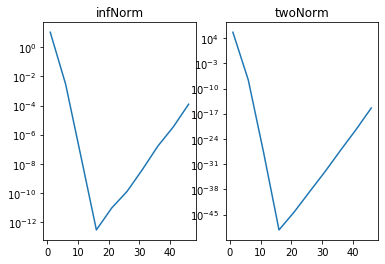

In [29]:
#For function f_2
iNorm = np.array([])
tNorm = np.array([])
for n in nVals:
    nLarge = 100*n
    x = np.linspace(0, np.pi/4, n)
    y = f_2(x)
    manyPoints = np.linspace(0, np.pi/4,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    tNorm = np.append(tNorm,twoNorm(f_2(manyPoints), interpolation, [0,1]))
    iNorm = np.append(iNorm,infNorm(f_2(manyPoints), interpolation))
                              

plt.subplot(1,2,1)
plt.semilogy(nVals, iNorm)
plt.title("infNorm")

plt.subplot(1,2,2)
plt.semilogy(nVals, tNorm)
plt.title("twoNorm")

In [31]:
x = np.append(np.array([]), np.array([1,2]))

In [32]:
np.append(x, np.array([3,4]))

array([1., 2., 3., 4.])

In [33]:
x

array([1., 2.])

In [10]:
#Problem c
def pieceWise(numberOfSubintervals, interval, function, nodes=5):
    solution = np.array([])
    functionPoints = np.array([])
    subIntervals = np.linspace(interval[0], interval[1], numberOfSubintervals)
    for i in range(1, len(subIntervals)):
        x = np.linspace(subIntervals[i-1],subIntervals[i],nodes+1)
        y = function(x)
        interpolation = lagInterp(x, y, np.linspace(subIntervals[i-1],subIntervals[i],nodes*10))
        subIntPoints = np.linspace(subIntervals[i-1],subIntervals[i],nodes*10)
        solution = np.append(solution, interpolation)
        functionPoints = np.append(functionPoints, subIntPoints)
    return infNorm(function(functionPoints), solution)

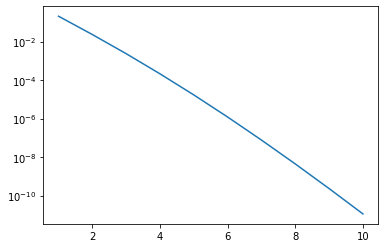

In [35]:
#For n = [1, ..10], we observe the difference in n for K=5 for the interval [0,1] and the function f_1
normList = np.array([])
for n in np.arange(1,11, 1):
    normList = np.append(normList, pieceWise(5, [0,1], f_1, n))
plt.semilogy(np.arange(1,11, 1), normList)

In [36]:
#Fixing n=10, we observe the the norm as k goes to infinity
normList = np.array([])
kVals = np.arange(2, 21)
for k in kVals:
    normList = np.append(normList, pieceWise(k, [0,1], f_1, 10))
    print("We are on k=", k)

We are on k= 2
We are on k= 3
We are on k= 4
We are on k= 5
We are on k= 6
We are on k= 7
We are on k= 8
We are on k= 9
We are on k= 10
We are on k= 11
We are on k= 12
We are on k= 13
We are on k= 14
We are on k= 15
We are on k= 16
We are on k= 17
We are on k= 18
We are on k= 19
We are on k= 20


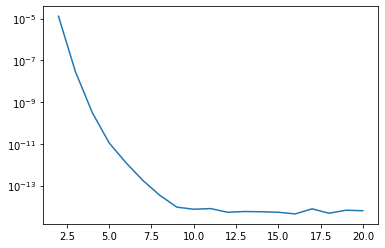

In [37]:
plt.semilogy(kVals, normList)

Text(0.5, 1.0, 'Piecewise method')

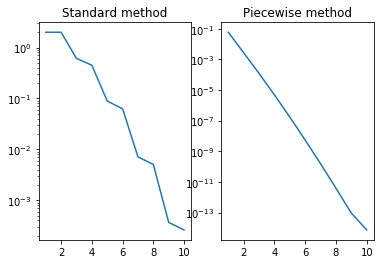

In [38]:
#Comparing the methods in b) and c) for k=10
normListStandard = np.array([])
normListPiecewise = np.array([])
nVals = np.arange(1,11, 1)
for n in nVals:
    normListPiecewise = np.append(normListPiecewise, pieceWise(10, [0,1], f_1, n))
    
    nLarge = 100*n
    x = np.linspace(0, 1, n)
    y = f_1(x)
    manyPoints = np.linspace(0, 1,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    normListStandard = np.append(normListStandard, infNorm(f_1(manyPoints), interpolation))

plt.subplot(1,2,1)
plt.semilogy(nVals, normListStandard)
plt.title("Standard method")

plt.subplot(1,2,2)
plt.semilogy(nVals, normListPiecewise)
plt.title("Piecewise method")

In [16]:
import autograd.numpy as np   # Thinly-wrapped version of Numpy
from autograd import grad

In [17]:
a = np.array([1, 2 , 3 ,4 ,5 ,6])
sorted(a)[0]

1

In [72]:
#Problem d

def interp(x, eta, function):
    poly = 0
    for i in range(len(x)):
        li = 1
        for j in range(len(x)):
            if(i==j):
                continue
            if((x[i]-x[j])==0.0):
                print("Divide by 0 at",i,j)
            li = li*((eta-x[j])/(x[i]-x[j]))
        poly += li*function(x[i])
    return poly
        

def cost(x, eta, interval, function):
    val = 0
    for i in range(len(eta)):
        val += (function(eta[i])-interp(x, eta[i], function))**2
    return ((interval[1]-interval[0])/len(eta))*val

In [103]:
x = np.linspace(0, 1, 10)
eta = np.random.uniform(0,1,10)
cost_test = cost(x, eta, [0,1], f_1)

In [98]:
grad_cost = grad(cost, 0)

In [99]:
grad_cost_test = grad_cost(x, eta, [0,1], f_1)

In [104]:
cost_test

1.0455434743403324e-08

In [102]:
grad_cost_test

array([-2.48162017e-07,  1.12164310e-07,  3.83367931e-08,  1.86730861e-08,
        8.62918008e-09,  1.20581559e-09, -7.39649229e-09, -2.34058337e-08,
       -6.63025244e-08,  2.30246200e-07])

In [38]:
def gradient_descent(x, eta, interval, shrink, function, max_iter = 15, tol = 1e-14):
    #Setting initial values
    c = 10**-4
    gradient = grad(cost, 0)
    x = x
    #Test with new interval
    
    p_k = -gradient(x, eta, interval, function)
    #print("This is p_k", p_k)
    norm_p_k = np.linalg.norm(p_k)
    
    grad_norm_list = [norm_p_k]
    
    while max_iter>0 and norm_p_k>tol:
        print("We are on iteration", 101-max_iter)
        print("This is the norm", norm_p_k)
        print("This is x", x)
        alpha = 100000000000
        
        rhs = (cost(x, eta, interval, function)+c*alpha*((-p_k)@p_k))
        lhs_1 = cost(x+1*p_k, eta, interval, function)
        lhs_2 = cost(x+10*p_k, eta, interval, function)
        lhs_3 = cost(x+100*p_k, eta, interval, function)
        print("These are lhs 1-3 and rhs", lhs_1, lhs_2, lhs_3, rhs)
        while (cost(x+alpha*p_k, eta, interval, function)>rhs):
            print("We are on alpha", alpha)
            alpha = shrink*alpha
        x = x + alpha*p_k
        p_k = -gradient(x, eta, interval, function)
        norm_p_k = np.linalg.norm(p_k)
        max_iter -= 1
        
        grad_norm_list += [norm_p_k]
    return x, grad_norm_list

In [40]:
x, cost_val, grad_val = gradient_descent(x, eta, [0,1], 0.1, f_1)

We are on iteration 86
This is the norm 3.218359311612998e-07
This is x [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
These are lhs 1-3 and rhs 7.681062869806483e-09 7.680130730150944e-09 7.670815250386907e-09 -1.0281024994171491e-06
We are on alpha 100000000000
We are on alpha 10000000000.0
We are on alpha 1000000000.0
We are on alpha 100000000.0
We are on alpha 10000000.0
We are on alpha 1000000.0
We are on alpha 100000.0
We are on alpha 10000.0
We are on alpha 1000.0
We are on alpha 100.0
We are on alpha 10.0
We are on alpha 1.0
We are on alpha 0.1
We are on alpha 0.010000000000000002
We are on alpha 0.0010000000000000002
We are on alpha 0.00010000000000000003
We are on alpha 1.0000000000000004e-05
We are on alpha 1.0000000000000004e-06
We are on alpha 1.0000000000000005e-07
We are on alpha 1.0000000000000005e-08
We are on alpha 1.0000000000000005e-09
We are on alpha 1.0000000000000006e-10
We are on alpha 1.000000000

We are on alpha 1.000000000000012e-201
We are on alpha 1.0000000000000119e-202
We are on alpha 1.000000000000012e-203
We are on alpha 1.000000000000012e-204
We are on alpha 1.0000000000000122e-205
We are on alpha 1.0000000000000122e-206
We are on alpha 1.0000000000000122e-207
We are on alpha 1.0000000000000122e-208
We are on alpha 1.0000000000000122e-209
We are on alpha 1.0000000000000122e-210
We are on alpha 1.0000000000000123e-211
We are on alpha 1.0000000000000124e-212
We are on alpha 1.0000000000000125e-213
We are on alpha 1.0000000000000125e-214
We are on alpha 1.0000000000000125e-215
We are on alpha 1.0000000000000126e-216
We are on alpha 1.0000000000000126e-217
We are on alpha 1.0000000000000126e-218
We are on alpha 1.0000000000000126e-219
We are on alpha 1.0000000000000126e-220
We are on alpha 1.0000000000000127e-221
We are on alpha 1.0000000000000128e-222
We are on alpha 1.0000000000000128e-223
We are on alpha 1.0000000000000129e-224
We are on alpha 1.0000000000000129e-225
We 

KeyboardInterrupt: 

In [56]:
np.linalg.norm(grad_val)

3.7097098235759773e-07

In [ ]:
#Plotting the cost function and norm of cost function for various etas


In [ ]:
#Compare results for different values of n
n_vals = np.arange(2, 100, 2)

error_equidistant=np.array([])
error_chebishev = np.array([])
error_optimised = np.array([])

eta = f_1(np.random.uniform(0,1,1000))

#For lagrangian
for n in n_vals:
    x = np.linspace(0,1,n)
    cheb = phi([0, 1], chebyshev(n))
    optimal, _, _ = gradient_descent(x, eta, [0,1], 0.1)
    
    interp_equidistant =
    interp_chebishev = 
    interp_optimal =
    
    np.append(error_equidistant, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_chebishev, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_optimised, twoNorm(f_1(x), interp, [0,1]))
    
error_equidistant=np.array([])
error_chebishev = np.array([])
error_optimised = np.array([])
    
#For piecewise
for n in n_vals:
    x = np.linspace(0,1,n)
    cheb = phi([0, 1], chebyshev(n))
    optimal, _, _ = gradient_descent(x, eta, [0,1], 0.1)
    
    interp_equidistant =
    interp_chebishev = 
    interp_optimal =
    
    np.append(error_equidistant, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_chebishev, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_optimised, twoNorm(f_1(x), interp, [0,1]))

In [41]:
a = np.array([[1,2],[3,4]])
a[0,1]

2

In [89]:
#e

def psi(x, big_eta):
    return np.exp(-(big_eta*x)**2)

def f_aprox(x_with_shape, eta, function):
    m = np.empty([len(x), len(x)])
    for i in range(len(x)-1):
        for j in range(len(x)-1):
            m[i,j] = psi(np.abs(x[i]-x[j]), x[-1])
    f = function(x)
    w = np.linalg.solve(m,f)
    approx = 0
    for i in range(len(x)-1):
        approx += w[i]*psi(np.abs(eta-x[i]), x[-1])
    return approx

def cost2(x_with_shape, eta, interval, function):
    cost_val = 0
    func_eta = function(eta)
    aprox = np.array([])
    for i in range(len(eta)):
        aprox = np.append(aprox, f_aprox(x_with_shape, eta[i], function))
    aprox = np.sum((func_eta-aprox)**2)
    return ((interval[1]-interval[0])/len(eta))*aprox
    
    
    
def f_3(x):
    return (0.75*(np.exp((-(9*x-2)**2)/4)))+np.exp((-(9*x+1)**2)/49)+0.5*np.exp((-(9*x-7)**2)/4)-0.1*np.exp(-(9*x-4)**2)
    

In [109]:
x = np.append(np.linspace(-1,1,10), np.array([1.1]))
eta = np.random.uniform(-1,1,100)
cost2(x, eta, [-1, 1], runge)

7.135116839324135e-08

In [110]:
grad_cost_2 = grad(cost2,0)

In [111]:
grad_cost_2(x, eta, [-1, 1], runge)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [82]:
def gradient_descent2(x, eta, interval, shrink, function, max_iter = 15, tol = 1e-14):
    #Setting initial values
    c = 10**-4
    gradient = grad(cost2, 0)
    x = x
    #Test with new interval
    
    p_k = -gradient(x, eta, interval, function)
    #print("This is p_k", p_k)
    norm_p_k = np.linalg.norm(p_k)
    
    grad_norm_list = [norm_p_k]
    
    while max_iter>0 and norm_p_k>tol:
        print("We are on iteration", 101-max_iter)
        print("This is the norm", norm_p_k)
        print("This is x", x)
        alpha = 1000
        
        rhs = (cost2(x, eta, interval, function)+c*alpha*((-p_k)@p_k))
        lhs_1 = cost2(x+1*p_k, eta, interval, function)
        lhs_2 = cost2(x+10*p_k, eta, interval, function)
        lhs_3 = cost2(x+100*p_k, eta, interval, function)
        print("These are lhs 1-3 and rhs", lhs_1, lhs_2, lhs_3, rhs)
        while (cost(x+alpha*p_k, eta, interval, function)>rhs):
            print("We are on alpha", alpha)
            alpha = shrink*alpha
        x = x + alpha*p_k
        p_k = -gradient(x, eta, interval, function)
        norm_p_k = np.linalg.norm(p_k)
        max_iter -= 1
        
        grad_norm_list += [norm_p_k]
    return x, grad_norm_list

In [105]:
x = np.append(np.linspace(-1,1,10), np.array([2]))
eta = np.random.uniform(0,1,100)
gradient_descent2(x, eta, [-1,1], 0.5, runge)

(array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
         0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ,
         2.        ]), [0.0])